# Lab 10: Visual Analytics Data application using Streamlit and Machine Learning (Evaluable)

# Lab goals:
In this project, we will build a Visual Analytics app that combines Streamlit and Machine Learning. In particular, our Data web app will explore and predict the salary of the software developers depending on the country, experience and level of education. 

As we have done during the course, we will follow the end-to-end **Machine Learning process**:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management)
2. Model Training: training a regression model. Analysis of metrics (i.e. R2_score, mean squared error,...)
3. Creating a Visual Analytics web app based on Streamlit to facilitate the exploration of data and prediction of the salary.

# Practice Information:
**Due date:** By end of November, 15th (23:55h)

**Submission procedure:** via Moodle.

**Name:** David Pérez Carrasco

**NIA:** 241375


# 0. Context:  

We work in a Human Resources Consultant company supporting to the business consultant team. A common request from our customers from the IT sector is a salary recommendation to be applied to their software development employees. 
Therefore, we have been requested to build a Web app with two minimum goals:
- 1 Exploration of salaries per country and experience
- 2 Prediction of a salary based on country, experience and education

We have access to an annual survey by Stack Overflow where we can find more than 67K software developers' answers. Part of the survey includes salary, experience, country, full/partial time employee, language, demographic information and so on.

Taking into consideration the request and this amazing survey you should develop your **own Visual Analytics Data Web** with two main parts:
- a) This Jupyter Notebook to explore the data (i.e. EDA), prepare the data and build a Machine Learning model that predicts the salary of a software employee at least based on **Country**, **Education** and **Experience** variables  
- b) A Streamlit app to explore the data and execute the salary prediction

# 1. Data Gathering
In the survey_results_schema.csv and the survey_results_public.csv you will obtain the schema of the survey and the responses.

Let's import some basic libraries and upload the **survey_results_public.csv** file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

Let's explore the data:

In [3]:

df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

# 2. Data Exploration and Data Wrangling 

**EX1** Let's select the variables we are interested in: `Country`, `Education`, `YearsCodePro`, `Employment` and `ConvertedCompYearly`. Rename `ConvertedCompYearly` to `Salary`.

In [5]:
selected_columns = ['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']
df = df[selected_columns].copy()
df.rename(columns={'ConvertedCompYearly': 'Salary'}, inplace=True)

Let's see the data again

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       71771 non-null  object 
 1   EdLevel       71571 non-null  object 
 2   YearsCodePro  51833 non-null  object 
 3   Employment    71709 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


**EX2** Remove the registers with any null in the features and verify all registers are not null

In [7]:
df = df.dropna()

# Verify if there are any null values left
if df.isnull().any().any():
    print("There are still null values in the DataFrame.")
else:
    print("No null values in the DataFrame.")

No null values in the DataFrame.


In [8]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


**EX3** Select the registers in the dataset that are full-employed and remove "employment" column

In [10]:
df = df[df['Employment'] == 'Employed, full-time'].copy()
df.drop(columns=['Employment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX4** Count the regiters per country and move all countries with less than cut-off registers to "Other"

In [11]:
cutoff = 80
# Count the number of registers per country
country_counts = df['Country'].value_counts()

# Calculate key values
mean_value = country_counts.mean()
median_value = country_counts.median()
q25 = country_counts.quantile(0.25)
q75 = country_counts.quantile(0.75)
# Calculate the percentage of countries with less or more than 100 employees
percentage_more_than_100 = (country_counts >= 100).mean() * 100
percentage_more_than_80 = (country_counts >= 80).mean() * 100

# Print key values
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Q25: {q25:.2f} (25% of countries have fewer employees)")
print(f"Q75: {q75:.2f} (75% of countries have fewer employees)")
print(f"Percentage of countries with 100 or more employees: {percentage_more_than_100:.2f}%")
print(f"Percentage of countries with 80 or more employees: {percentage_more_than_80:.2f}%")
print(country_counts)

# Identify countries with fewer registers than the cutoff
countries_to_replace = country_counts[country_counts < 80].index

# Replace countries with fewer registers than the cutoff with 'Other'
df.loc[df['Country'].isin(countries_to_replace), 'Country'] = 'Other'

Mean: 202.46
Median: 24.00
Q25: 6.00 (25% of countries have fewer employees)
Q75: 145.50 (75% of countries have fewer employees)
Percentage of countries with 100 or more employees: 29.03%
Percentage of countries with 80 or more employees: 33.55%
Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64


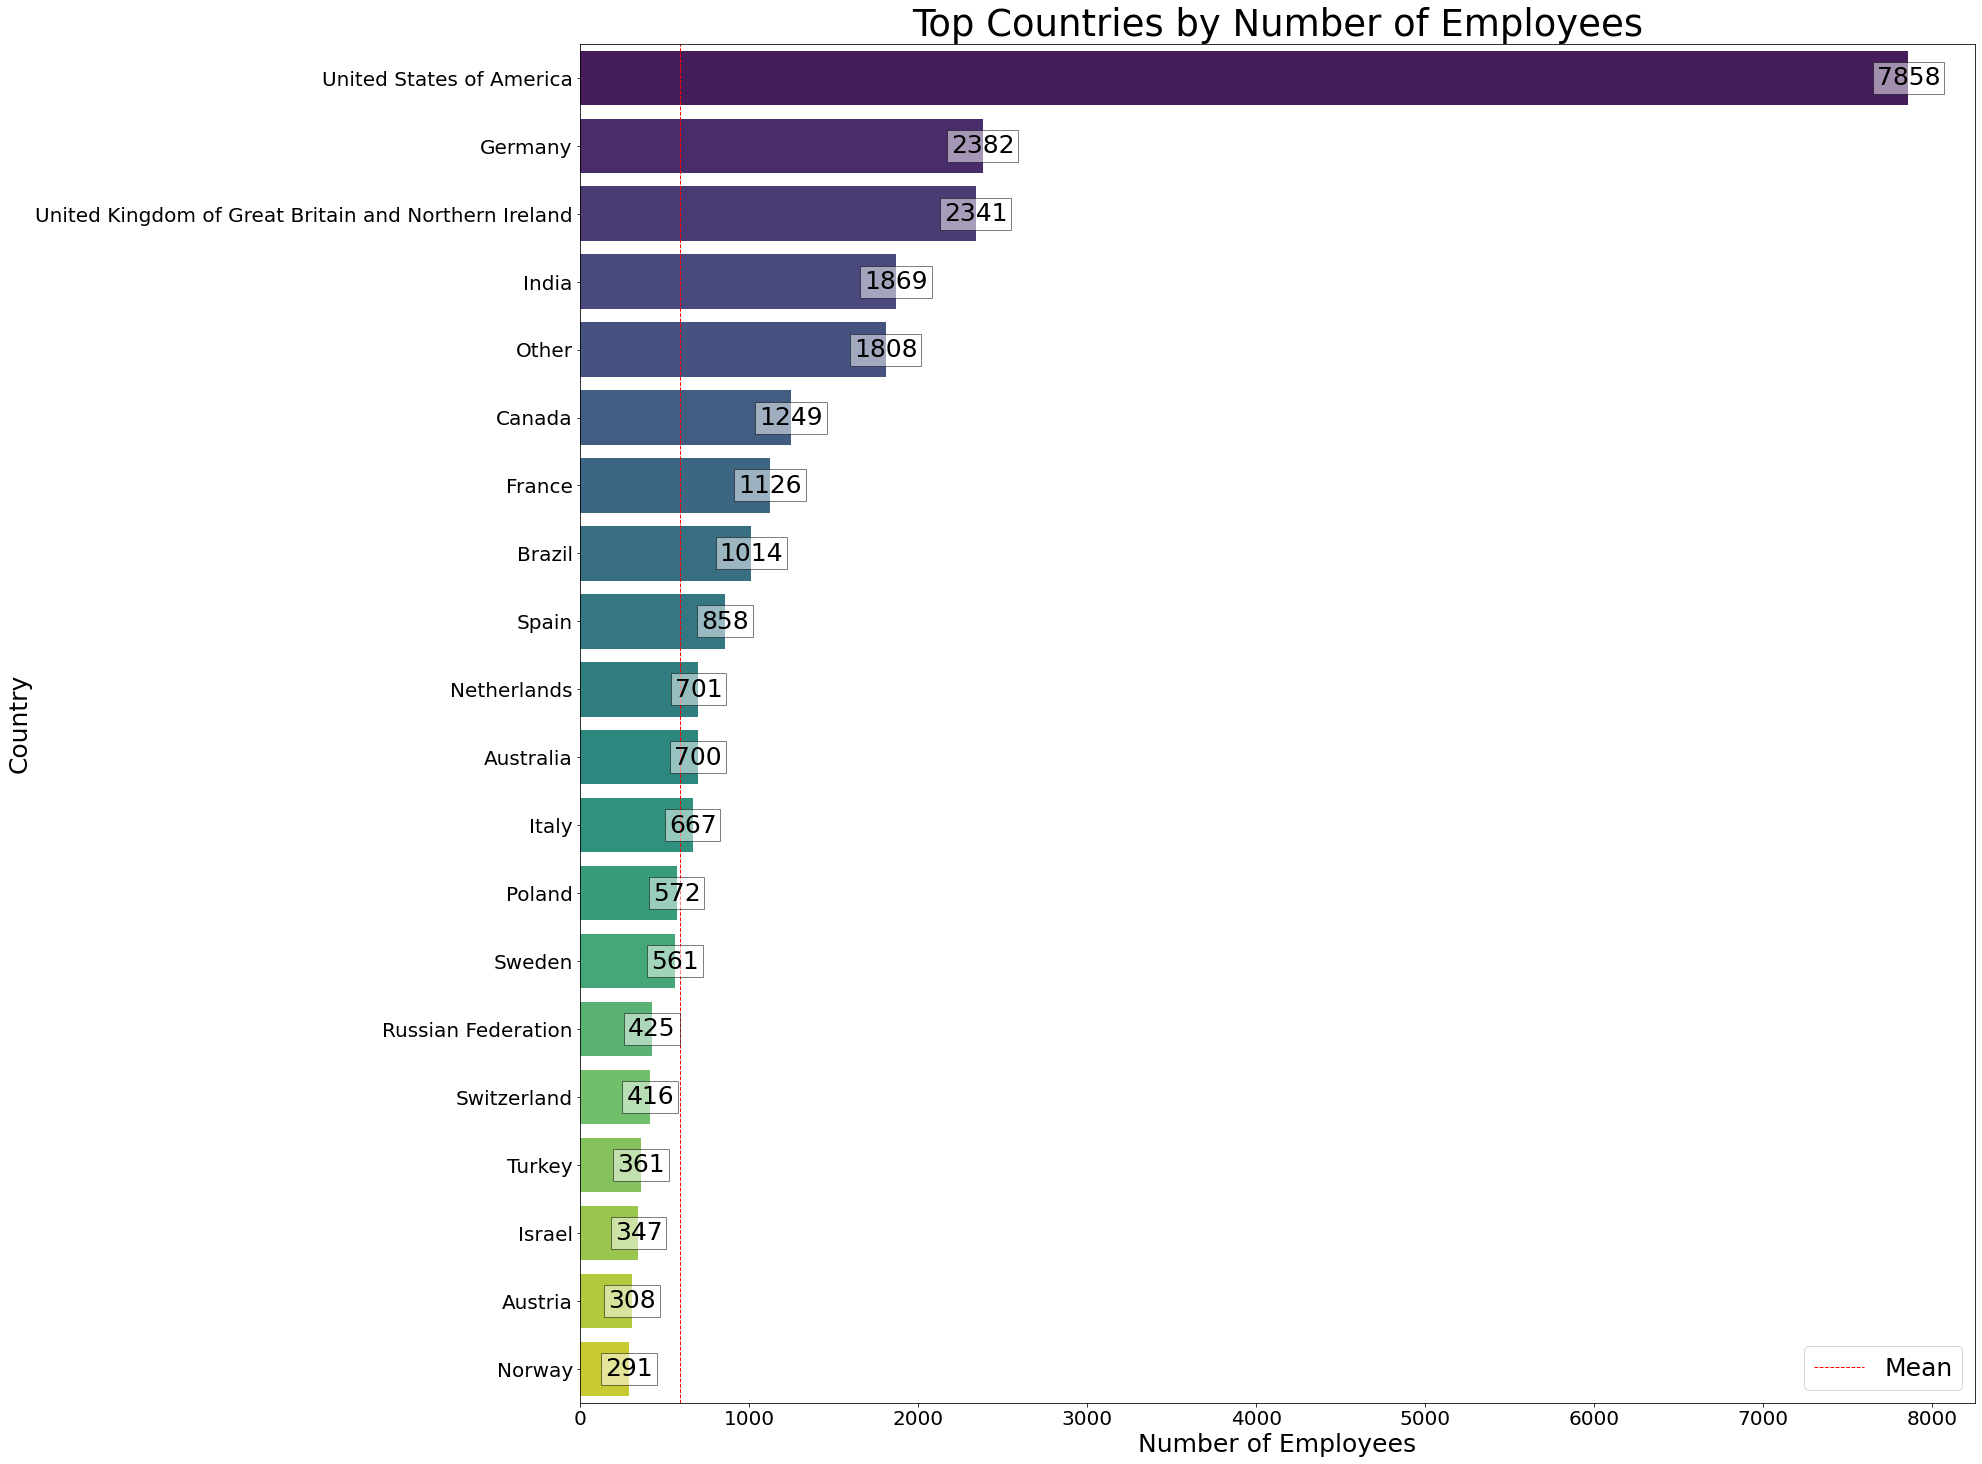

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the top N countries for better readability
top_countries = df['Country'].value_counts().nlargest(20).index

# Create a DataFrame for only the top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Order the countries by the number of employees
order = df_top_countries['Country'].value_counts().index

# Set the plot size
plot_size = (25, 25)

plt.figure(figsize=plot_size)

# Plotting the horizontal bar chart with ordered countries and white background for labels
ax = sns.countplot(y='Country', data=df_top_countries, palette='viridis', order=order)
plt.title('Top Countries by Number of Employees', fontsize=int(plot_size[0]*1.5))
plt.xlabel('Number of Employees', fontsize=int(plot_size[0]))
plt.ylabel('Country', fontsize=int(plot_size[0]))

# Annotate the bars with the actual counts for better clarity
for index, value in enumerate(df_top_countries['Country'].value_counts()):
    ax.text(value + 0.1, index, str(value), ha='center', va='center', fontsize=int(plot_size[0]), bbox=dict(facecolor='white', alpha=0.5))

# Draw a mean line
mean_value = df['Country'].value_counts().mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')

ax.tick_params(axis='both', which='major', labelsize=int(plot_size[0]*0.8))

# Set legend fontsize proportional to the plot size
plt.legend(fontsize=int(plot_size[0]))

plt.show()

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX5** To analyze the distribution of salaries per countries, build a boxplot per `country` and `salary`.

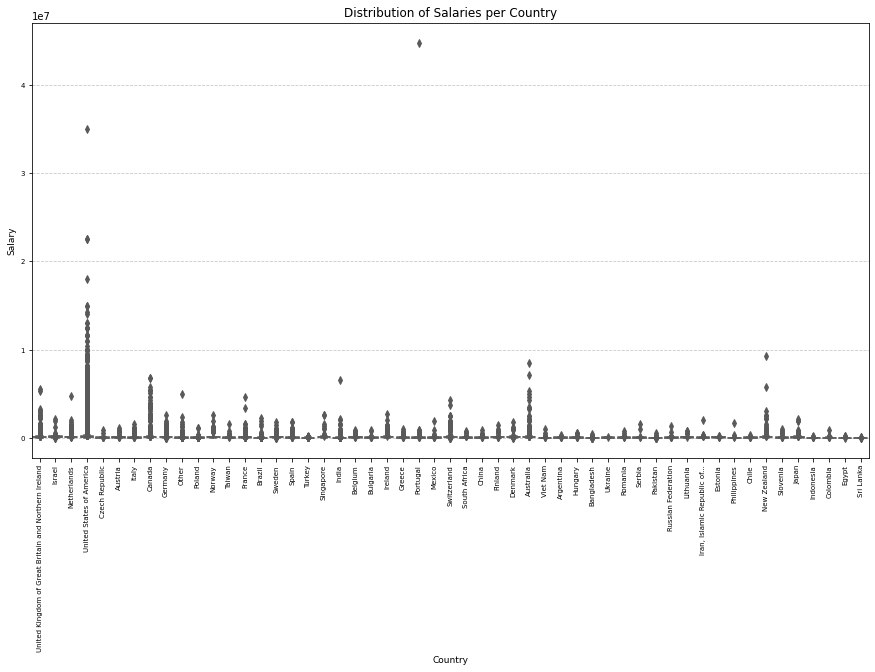

In [14]:
# Set the plot size
# Set the plot size
plot_size = (15, 8)
plt.figure(figsize=plot_size)

# Define a custom color palette for better visibility
custom_palette = sns.color_palette("Set2")

# Plotting the boxplot for salaries per country with customizations
sns.boxplot(x='Country', y='Salary', data=df, palette=custom_palette)
plt.title('Distribution of Salaries per Country', fontsize=int(plot_size[0]*0.8))
plt.xlabel('Country', fontsize=int(plot_size[0]*0.6))
plt.ylabel('Salary', fontsize=int(plot_size[0]*0.6))
plt.xticks(rotation=90, fontsize=int(plot_size[0]*0.5))  # Rotate country names for better readability

# Adjust tick label font size on the y-axis
plt.yticks(fontsize=int(plot_size[0]*0.5))

# Customize the grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**EX6** To improve the resolution, filter the dataset based on salary between 10K and 250K and verify the distribution of salaries per country. Which are the most relevant insights based on these new boxplots?


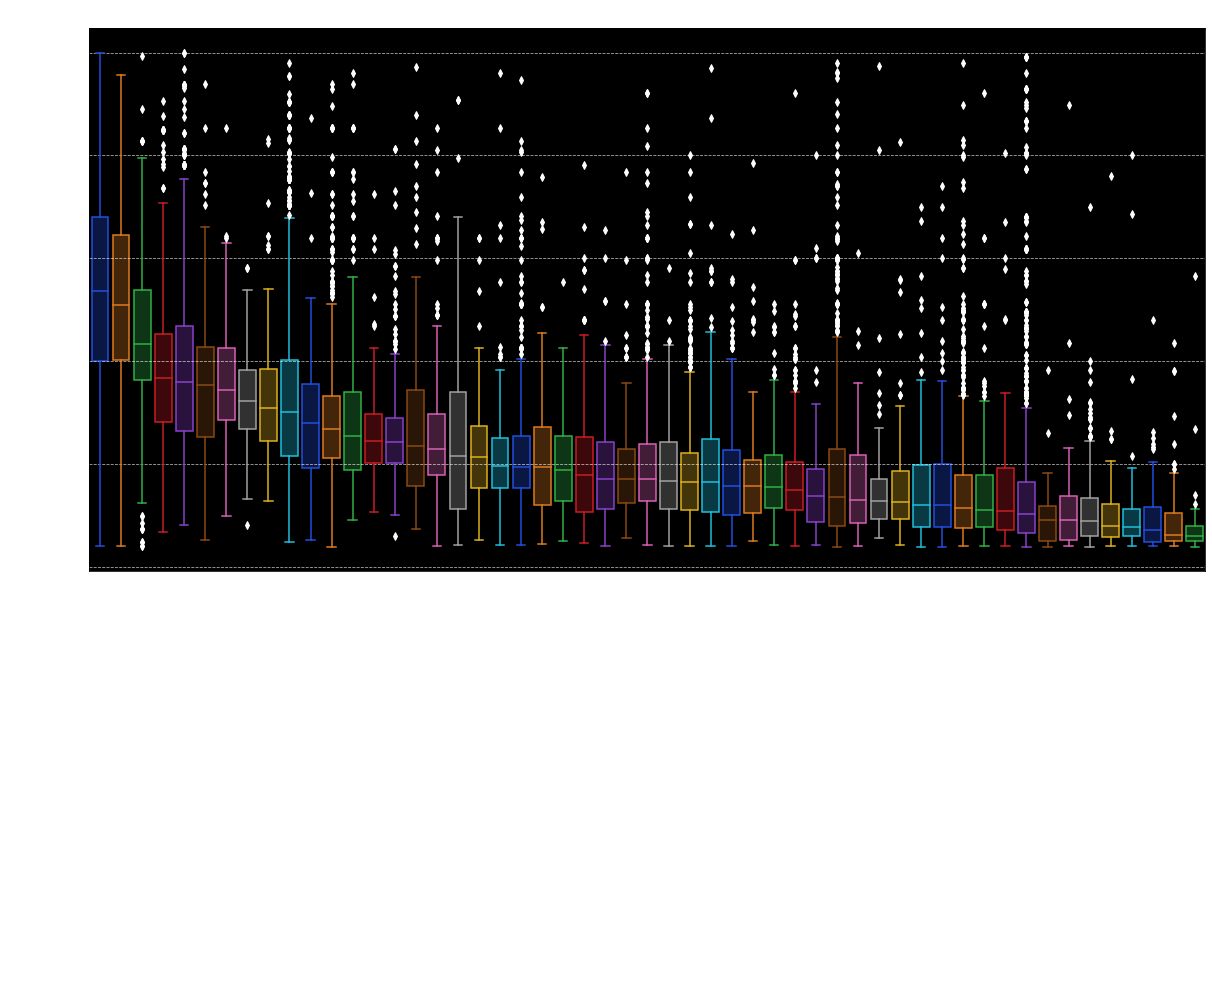

In [15]:
# Filter the dataset based on salary range
df = df[(df['Salary'] >= 10000) & (df['Salary'] <= 250000)]

# Set the plot size
plot_size = (20, 10)
plt.figure(figsize=plot_size)

# Define a custom color palette for better visibility
custom_palette = sns.color_palette("bright", n_colors = 50)

# Sort the dataframe by median salary per country
sorted_countries = df.groupby('Country')['Salary'].median().sort_values(ascending=False).index

# Set the background to black
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Plotting the boxplot for filtered salaries per country with customizations
box_plot = sns.boxplot(x='Country', y='Salary', data=df, palette=custom_palette, order=sorted_countries, showfliers=True)
for flier in box_plot.lines:
    flier.set_markeredgecolor('white')
    flier.set_markerfacecolor('white')
# Change the color of the outlier points and the lines of the boxplots
for i, artist in enumerate(box_plot.artists):
    col = artist.get_facecolor()
    # Change the color of the lines of the boxplots
    for j in range(6*i,6*(i+1)):
         box_plot.lines[j].set_color(col)

plt.title('Distribution of Salaries per Country (10K to 250K)', fontsize=int(plot_size[0]))
plt.xlabel('Country', fontsize=int(plot_size[0]*0.9))
plt.ylabel('Salary', fontsize=int(plot_size[0]*0.9))
plt.xticks(rotation=90, fontsize=int(plot_size[0]*0.7))  # Rotate country names for better readability

# Adjust tick label font size on the y-axis
plt.yticks(fontsize=int(plot_size[0]*0.7))

# Customize the grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Highlight the median line inside the boxplot
for patch in plt.gca().artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
    patch.set_edgecolor((r, g, b, 1))

# Annotate the country with the highest median salary
highest_country = sorted_countries[0]

plt.show()


The most relevant insights are about the differences between the salary distribution among the different countries. In my ordered box plots, we can see how United satets is the country with highest mean salary and with the highest quantiles too. Also, we can see how Spain is really far from the first positions. We can also notice how almost all the countries contain several outliers, since in all conuntries there are people with considerably higher salaries than the expected.

Let's prepare the `YearsCodePro` to integer. We will build a new **clean_experience()** function to encode over 50 years and below 0.5 years of experience respectively.

In [16]:
print(type(df["YearsCodePro"]))
df["YearsCodePro"].unique()

<class 'pandas.core.series.Series'>


array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [17]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27080 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27080 non-null  object 
 1   EdLevel       27080 non-null  object 
 2   YearsCodePro  27080 non-null  float64
 3   Salary        27080 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


Let's normalize the different values of the `EdLevel`. We will build a new **clean_education** function to normalize the education levels.

In [19]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [20]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [21]:
df["EdLevel"].unique()
df = df

In [22]:
#df.to_csv('countries.csv', index=False)

**EX7** Encode using **LabelEncoder** function the `EdLevel` and `Country` columns. Store them into the same `EdLevel` and `Country` columns. 

In [23]:
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder objects
ed_level_encoder = LabelEncoder()
country_encoder = LabelEncoder()
# Encode 'EdLevel' and 'Country' columns
df['EdLevel'] = ed_level_encoder.fit_transform(df['EdLevel'])
df['Country'] = country_encoder.fit_transform(df['Country'])

# Display the first few rows of the modified DataFrame
print(df.head())

    Country  EdLevel  YearsCodePro    Salary
2        50        2           5.0   40205.0
3        24        0          17.0  215232.0
8        29        2           6.0   49056.0
10       50        0           2.0   60307.0
12       51        0           5.0   65000.0


In [167]:
#df.to_csv('encoded.csv', index=False)

# 2. Modelling 

We are ready to build a ML model to predict the salary based on the 3 variables: country, education level and years of experience. 

**EX8** Split into train and test dataset and verify the length of all datasets.

In [24]:
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the column you are trying to predict
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the lengths of the datasets
print(f"Number of samples in the original dataset: {len(df)}")
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the testing set: {len(X_test)}")

Number of samples in the original dataset: 27080
Number of samples in the training set: 21664
Number of samples in the testing set: 5416


**EX9** Apply a Linear Regression model to fit and evaluate the performance of the prediction based on the mean squared error.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2080608484.7065248


**EX10** Repeat the **EX9** using a RandomForest model. Has it improved the mean squared error?

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 1208467209.6967304


Yes, it has improved the mean squared error by around 80 million of squared $.

In order to find the best hyperparameters for the regression model, we will use **GridsearchCV** apply to the Random Forest.

In [27]:
from sklearn.model_selection import GridSearchCV

max_depth = [6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

Once calculate the **best estimator**, we will apply to our use case and calculate the **mean squared error**.

In [28]:
import numpy as np
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

$33,914.83


**EX11** Calculate the performance based on **R2 score** of the regression model fitted with the best estimator. Which is your consideration about the performance of the model? Justify your answer.

In [29]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred_test are your true and predicted values
r2 = r2_score(y_test, y_pred_test)

print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.58


A R2 score of 0.58 means the model is explaining the 58% of the variance of the mode, which is a good fit, but there is still room for improvement.

**EX12** Make a prediction for a software developer in `Spain`, with `Master's degree` and 15 years of experience.

In [30]:
# Define the input values
input_data = pd.DataFrame({
    'Country': ['Spain'],
    'EdLevel': ['Master’s degree'],
    'YearsCodePro': [15]
})
input_data['Country'] = country_encoder.transform(input_data['Country'])
input_data['EdLevel'] = ed_level_encoder.transform(input_data['EdLevel'])

# Make a prediction using the trained model
predicted_salary = random_forest_reg.predict(input_data)

# Print the predicted salary
print("The predicted salary is ${:,.02f}".format(predicted_salary[0]))


The predicted salary is $64,534.28


# 3. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [31]:

import pickle

In [32]:
data = {"model": random_forest_reg, "le_country": country_encoder, "le_education": ed_level_encoder}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [33]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

You can also make a prediction with a sample as follows:

In [34]:
y_pred = regressor_loaded.predict(X_test)
y_pred

array([69602.54505636, 33888.04928849, 95316.66353638, ...,
       89232.59132598, 22433.86671487, 47955.34253868])

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.

# 4. Extra Model

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [8]:
# YearsCode column
years_code_counts = df['YearsCode'].value_counts()

# OrgSize column
org_size_counts = df['OrgSize'].value_counts()

# DevType column
dev_type_counts = df['DevType'].value_counts()

# Display the results
print("YearsCode:")
print(years_code_counts)

print("\nOrgSize:")
print(org_size_counts)

print("\nDevType:")
print(dev_type_counts)

YearsCode:
YearsCode
10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36     

In [55]:
selected_columns = ['Country', 'EdLevel', 'YearsCodePro', 'Employment','OrgSize','DevType', 'ConvertedCompYearly']
df = df[selected_columns].copy()
df.rename(columns={'ConvertedCompYearly': 'Salary'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       71771 non-null  object 
 1   EdLevel       71571 non-null  object 
 2   YearsCodePro  51833 non-null  object 
 3   Employment    71709 non-null  object 
 4   OrgSize       51039 non-null  object 
 5   DevType       61302 non-null  object 
 6   Salary        38071 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.9+ MB


In [56]:
df = df.dropna()

# Verify if there are any null values left
if df.isnull().any().any():
    print("There are still null values in the DataFrame.")
else:
    print("No null values in the DataFrame.")
df.info()

No null values in the DataFrame.
<class 'pandas.core.frame.DataFrame'>
Index: 37828 entries, 2 to 73121
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37828 non-null  object 
 1   EdLevel       37828 non-null  object 
 2   YearsCodePro  37828 non-null  object 
 3   Employment    37828 non-null  object 
 4   OrgSize       37828 non-null  object 
 5   DevType       37828 non-null  object 
 6   Salary        37828 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.3+ MB


In [57]:
df = df[df['Employment'] == 'Employed, full-time'].copy()
df.drop(columns=['Employment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31345 entries, 2 to 73121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31345 non-null  object 
 1   EdLevel       31345 non-null  object 
 2   YearsCodePro  31345 non-null  object 
 3   OrgSize       31345 non-null  object 
 4   DevType       31345 non-null  object 
 5   Salary        31345 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [58]:
cutoff = 80
# Count the number of registers per country
country_counts = df['Country'].value_counts()

# Identify countries with fewer registers than the cutoff
countries_to_replace = country_counts[country_counts < 80].index

# Replace countries with fewer registers than the cutoff with 'Other'
df.loc[df['Country'].isin(countries_to_replace), 'Country'] = 'Other'

In [59]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)


In [60]:
def clean_org_size(x):
    if '20 to 99 employees' in x:
        return 20
    elif '100 to 499 employees' in x:
        return 100
    elif '10,000 or more employees' in x:
        return 10000
    elif '1,000 to 4,999 employees' in x:
        return 1000
    elif '2 to 9 employees' in x:
        return 2
    elif '10 to 19 employees' in x:
        return 10
    elif '500 to 999 employees' in x:
        return 500
    elif 'just me - i am a freelancer, sole proprietor, etc.' in x.lower():
        return 1
    elif '5,000 to 9,999 employees' in x:
        return 5000
    else:
        return None

# Apply the cleaning function to 'OrgSize'
df['OrgSize'] = df['OrgSize'].apply(clean_org_size)

# Drop rows with "I don't know"
df = df[df['OrgSize'].notna()]

# Display the modified DataFrame
print(df['OrgSize'].value_counts())

OrgSize
20.0       6719
100.0      6379
10000.0    4822
1000.0     4051
10.0       2558
500.0      2511
2.0        2246
5000.0     1553
1.0          83
Name: count, dtype: int64


In [61]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30922 entries, 2 to 73121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30922 non-null  object 
 1   EdLevel       30922 non-null  object 
 2   YearsCodePro  30922 non-null  float64
 3   OrgSize       30922 non-null  float64
 4   DevType       30922 non-null  object 
 5   Salary        30922 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


In [62]:
print(df['DevType'].unique())
print("Number of unique values in 'DevType':", len(df['DevType'].unique()))

['Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability'
 'Developer, full-stack' 'Developer, full-stack;Developer, back-end' ...
 'Developer, mobile;Database administrator'
 'Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;DevOps specialist;Project manager;System administrator'
 'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Database administrator;Developer, embedded applications or devices;Cloud infrastructure engineer']
Number of unique values in 'DevType': 5040


In [66]:
# Count the occurrences of each DevType
devtype_counts = df['DevType'].value_counts()

# Identify DevTypes with less than 75 occurrences
devtypes_to_replace = devtype_counts[devtype_counts < 75].index
devtypes_to_replace = devtypes_to_replace.union(['Other (please specify):'])

# Replace those DevTypes with 'Other' in a new DataFrame (df2)
df = df.copy()
df['DevType'] = df['DevType'].apply(lambda x: 'Other' if x in devtypes_to_replace else x)

# Print the number of unique values in 'DevType' in df2
print("Number of unique values in 'DevType' in filtered df:", len(df['DevType'].unique()))

Number of unique values in 'DevType' in filtered df: 39


In [67]:
#df.to_csv('complex.csv', index=False)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects
ed_level_encoder = LabelEncoder()
country_encoder = LabelEncoder()
devtype_encoder = LabelEncoder()
# Encode 'EdLevel' and 'Country' columns
df['EdLevel'] = ed_level_encoder.fit_transform(df['EdLevel'])
df['Country'] = country_encoder.fit_transform(df['Country'])
df['DevType'] = devtype_encoder.fit_transform(df['DevType'])

# Display the first few rows of the modified DataFrame
print(df.head())

    Country  EdLevel  YearsCodePro  OrgSize  DevType    Salary
2        50        2           5.0     20.0       37   40205.0
3        24        0          17.0    100.0       24  215232.0
10       50        0           2.0    100.0       27   60307.0
12       51        0           5.0      2.0       24   65000.0
16       11        0           4.0      2.0       24   19224.0


In [36]:
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the column you are trying to predict
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the lengths of the datasets
print(f"Number of samples in the original dataset: {len(df)}")
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the testing set: {len(X_test)}")

Number of samples in the original dataset: 30922
Number of samples in the training set: 24737
Number of samples in the testing set: 6185


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 428446275806.02637


In [40]:
from sklearn.model_selection import GridSearchCV

max_depth = [6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

In [41]:
import numpy as np
from sklearn.metrics import r2_score

random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

# Assuming y_test and y_pred_test are your true and predicted values
r2 = r2_score(y_test, y_pred_test)

print("R2 Score: {:.2f}".format(r2))

$569,040.88
R2 Score: 0.02


As we can see, the model is consdierably worse than the previous one. However, since this is a visual analytics project and not a machine learning project, no model optimization will be considered. Only the data processing, the data analyhsis and data visualization is relevant here, which has been performed in order to implement this model. Moreover, it is undeniable that a predictive model with an error like this could not be used in a realistic application, however, since this is a visual analytics project, I will provide the feauture in a extra page, warning the users about its lack of reliability.

Therefore, I included this prediction model as an extra page to enhance the xomplexity and completeness of the webapp, but I included a note warning about the lack of accuracy. Thus, the complete visualizations about the predictions appear only on the accurate model, and the complex one has only the predicted value. What might be considered about this model is not its accuracy but the data processing process and the webapp linkage process with the data. In further extensions or in machine learning projects, the model should and must be optimized before using it in the app, but since it is not the case I have decided to use it anyway with the corresponding disclaimer. It can be consdiered as an extra part, since the webapp was already complete and complex enough to satisfy all the requirementes and more than what was expected, but i this way the extra model is also visualized in the webapp.

In [42]:

import pickle

In [43]:
data = {"model": random_forest_reg, "le_country": country_encoder, "le_education": ed_level_encoder, "le_devtype": devtype_encoder}
with open('saved_steps2.pkl', 'wb') as file:
    pickle.dump(data, file)